In [1]:
from fair_cc_functions import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# generates unfair and corresponding fair graph, computes clusters for these graphs and their costs
# for all amount of nodes from 4 to n with 10 iterations by default
# returns 2 arrays with the means of unfair and fair costs
def stats_complete(unfair_graph):
    stats = []
    nodes = len(unfair_graph.nodes)
    if nodes < 4: return -1
    fairlets = create_fairlets(unfair_graph)
    fair_graph = nx.Graph()
    fair_graph.add_nodes_from(fairlets)
    fair_p, fair_m = create_fairlet_relations(fairlets, unfair_graph)
    fair_graph.add_weighted_edges_from(fair_p)
    fair_graph.add_weighted_edges_from(fair_m)
    fair_cluster = cc_pivot(fair_graph)
    costs = cost(fair_cluster, unfair_graph)
    stats.append(costs)
    return stats

def stats_incomplete(unfair_graph, iteration=10):
    stats = []
    nodes = len(unfair_graph.nodes())
    if nodes < 4: return -1
    for j in range(iteration):
        fairlets = create_fairlets(unfair_graph)
        fair_graph = nx.Graph()
        fair_graph.add_nodes_from(fairlets)
        fair_p, fair_m = create_fairlet_relations_incomplete(fairlets, unfair_graph)
        fair_graph.add_weighted_edges_from(fair_p)
        fair_graph.add_weighted_edges_from(fair_m)
        fair_cluster = cc_pivot(fair_graph)
        costs = cost(fair_cluster, unfair_graph)
        stats.append(costs)
    return stats

In [3]:
# stats for scenario 1
# always same costs as already optimal
res0 = []
for i in range(10, 61, 2):
    unfair_graph = generate_complete_graph(i)
    res0.append(stats_complete(unfair_graph))
nodes = [i for i in range(10, 61, 2)]
max_calc_cost = [i*i/4 for i in nodes]

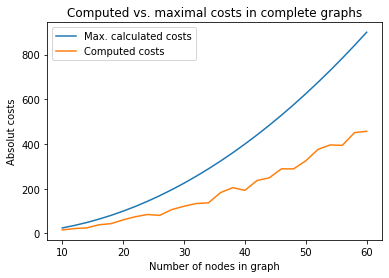

In [4]:
plt.plot(nodes, max_calc_cost, label='Max. calculated costs')
plt.plot(nodes, res0, label='Computed costs')
plt.ylabel('Absolut costs')
plt.xlabel('Number of nodes in graph')
plt.title('Computed vs. maximal costs in complete graphs')
plt.legend()
plt.savefig('../comp_vs_calc_cost_complete_graph.png')
plt.savefig('CompleteGraphsPlots/comp_vs_calc_cost_complete_graph.png')
plt.show()

In [5]:
# similar density of incomplete graphs
# probability for (+), resp. (-), is 0.5 in red and blue subgraphs => expected same density
rnd_rnd = []
for i in range(10, 61, 2):
    unfair_graph = generate_incomplete_graph(i)
    stat = stats_incomplete(unfair_graph, iteration=100)
    rnd_rnd.append(stat)

In [6]:
# red/blue subgraphs are both sparse (regarding (+) relations)
tree_tree, tree_star, star_star, cyc_cyc = [], [], [], []
for i in range(10, 61, 2):
    tree_tree_graph = generate_red_blue_graph(i, 'bal_bin_tree', 'bal_bin_tree')
    tree_star_graph = generate_red_blue_graph(i, 'bal_bin_tree', 'star')
    star_star_graph = generate_red_blue_graph(i, 'star', 'star')
    cyc_cyc_graph = generate_red_blue_graph(i, 'circle', 'circle')
    tree_tree.append(stats_incomplete(tree_tree_graph, iteration=100))
    tree_star.append(stats_incomplete(tree_star_graph, iteration=100))
    star_star.append(stats_incomplete(star_star_graph, iteration=100))
    cyc_cyc.append(stats_incomplete(cyc_cyc_graph, iteration=100))

In [7]:
# red/blue subgraphs are both dense (regarding (+) relations)
bipar_bipar =[]
for i in range(10, 61, 2):
    bipar_bipar_grap  = generate_red_blue_graph(i, 'bipartite', 'bipartite')
    bipar_bipar.append(stats_incomplete(bipar_bipar_grap, iteration=100))
    # clique_clique_graph = generate_red_blue_graph(i, 'clique', 'clique')
    # clique_clique.append(stats_incomplete(clique_clique_graph, iteration=50))
    # bipar_clique_graph = generate_red_blue_graph(i, 'clique', 'bipartite')
    # bipar_clique.append(stats_incomplete(bipar_clique_graph, iteration=50))

In [8]:
# red/blue subgraph are dense/sparse (regarding + relations)
tree_bipar, star_bipar, cyc_bipar = [], [], []
for i in range(10, 61, 2):
    tree_bipar_graph = generate_red_blue_graph(i, 'bal_bin_tree', 'bipartite')
    star_bipar_graph = generate_red_blue_graph(i, 'star', 'bipartite')
    cyc_bipar_graph = generate_red_blue_graph(i, 'circle', 'bipartite')
    tree_bipar.append(stats_incomplete(tree_bipar_graph, iteration=100))
    star_bipar.append(stats_incomplete(star_bipar_graph, iteration=100))
    cyc_bipar.append(stats_incomplete(cyc_bipar_graph, iteration=100))

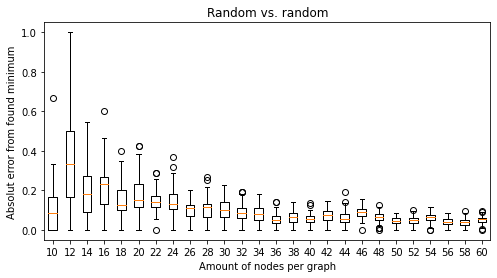

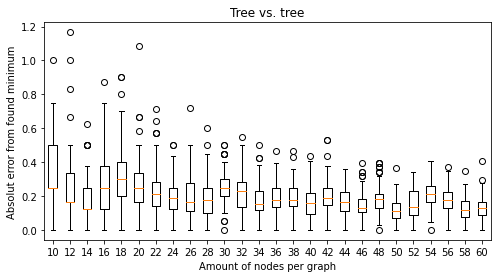

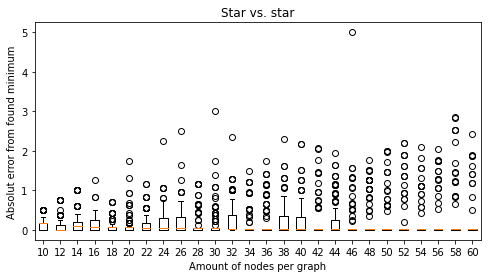

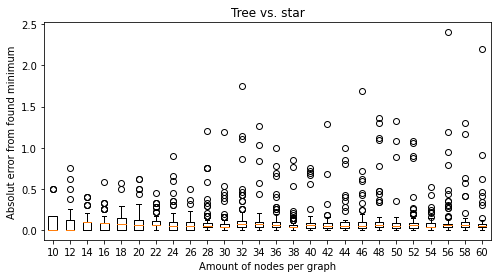

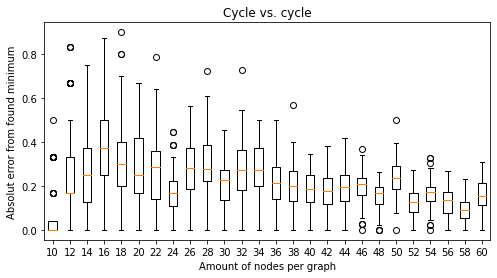

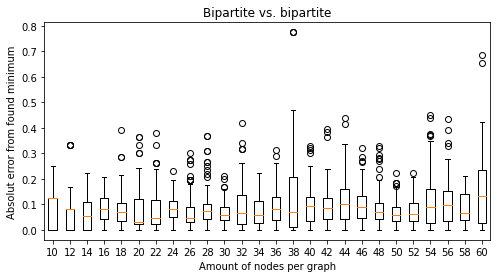

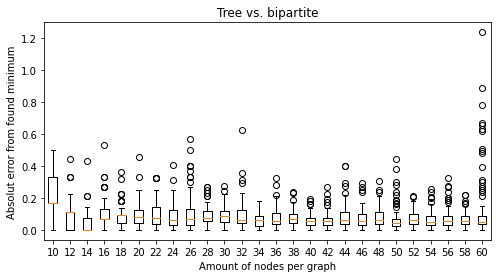

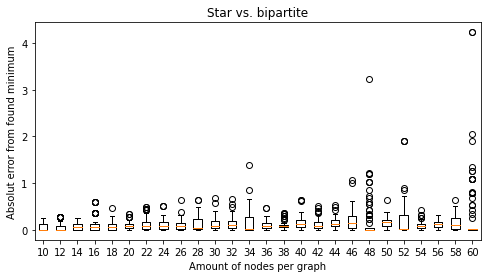

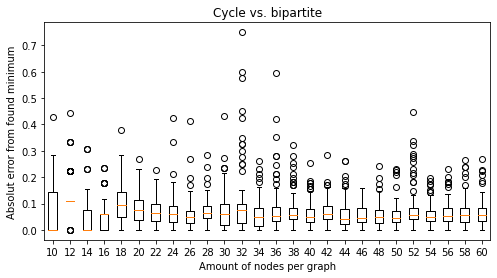

In [25]:
# random vs. random plot
def generate_boxplot(to_plot,
                     title='Title',
                     ylabel ='Absolut error from found minimum',
                     xlabel='Amount of nodes per graph',
                     name='boxplot.png'):

    fig1, ax1 = plt.subplots(1, 1, figsize=(8,4))
    # scale data so that 0 corresponds to optimal cost and 1 to 3 times optimal costs (equation)
    ax1.boxplot([(i-j)/(k-j) for i,j,k in zip(to_plot, np.min(to_plot, axis=1), 3*np.min(to_plot, axis=1))])
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    ax1.set_xticks([i for i in range(1,27)], nodes)
    #plt.savefig('IncompleteGraphsPlots/{}'.format(name))
    plt.show()

generate_boxplot(rnd_rnd, 'Random vs. random', name='random_random.png')
generate_boxplot(tree_tree, 'Tree vs. tree', name='tree_tree.png')
generate_boxplot(star_star, 'Star vs. star', name='star_star.png')
generate_boxplot(tree_star, 'Tree vs. star', name='tree_star.png')
generate_boxplot(cyc_cyc, 'Cycle vs. cycle', name='cyc_cyc.png')
generate_boxplot(bipar_bipar, 'Bipartite vs. bipartite', name='bipar_bipar.png')
# generate_boxplot(clique_clique, 'Clique vs. clique', name='clique_clique.png')
# generate_boxplot(bipar_clique, 'Bipartite vs. clique', name='bipar_clique.png')
generate_boxplot(tree_bipar, 'Tree vs. bipartite', name='tree_bipar.png')
generate_boxplot(star_bipar, 'Star vs. bipartite', name='star_bipar.png')
generate_boxplot(cyc_bipar, 'Cycle vs. bipartite', name='cyc_bipar.png')

0.7745098039215687